In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt   
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("stores_dataset.csv")
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


### 1. Check missing values and duplicate records

In [6]:
df.shape

(99457, 13)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.isnull().sum()

number of duplicate rows:  (0, 13)


invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

### 2. Add column name 'Total Sales'

In [10]:
df['Total Sales']=df['selling_price_per_unit'] * df['quantity']
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00


### 3. How many customers have age more than 60?

In [12]:
count = (df['age'] > 60).sum()
count

17169

### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [14]:
unique_customers = df['customer_id'].nunique()
duplicate_rows_df = df[df.duplicated()]
print("Unique Customer: ",unique_customers)
print("number of duplicate rows: ", duplicate_rows_df.shape)

Unique Customer:  99457
number of duplicate rows:  (0, 14)


### 5. Are there more male or female customers, Show in Pie Chart?

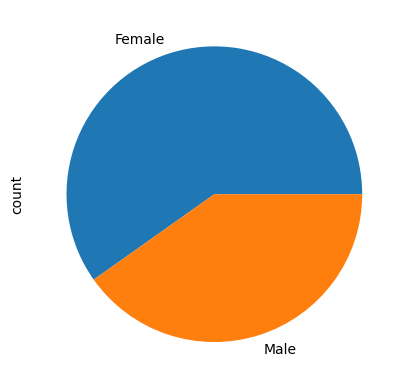

In [16]:
df.gender.value_counts().plot(kind='pie')
plt.show()

### 6. Which category is least popular among customers?

In [18]:
category_counts = df['category'].value_counts()
popular_category = category_counts.idxmin()
popular_category

'Books'

### 7. Which category has the highest sales volume?

In [20]:
df.groupby('category')['selling_price_per_unit'].mean()

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: selling_price_per_unit, dtype: float64

### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [24]:
df['Total Profit']= df['Total Sales'] - df['cost_price_per_unit']* df['quantity']
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,375.1000
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,540.1530
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,500.4250
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,60.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,73.3125
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,6.2760
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,6.2760
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,1680.0000


### 9. Display the top 10 invoices with the highest quantities sold?

In [65]:
top_invoices = df.sort_values(by='quantity', ascending=False).head(10)
top_invoices[['invoice_no', 'quantity']]

,invoice_no,quantity
100,I283443,15
275,I282789,12
109,I293215,12
305,I115679,11
129,I160221,10
61,I207205,10
224,I353272,10
201,I286193,9
145,I246375,8
11,I139207,8


### 10. Which payment method is most commonly used?

In [30]:
payment_method = df['payment_method'].value_counts().idxmax()
payment_method

'Cash'

### 11. Total Sales with respect to region?

In [33]:
region = df.groupby('region')['Total Sales'].sum()
region

region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64

### 12. Sort Malls with average sales higher to lower?

In [36]:
average_mall = df.groupby('shopping_mall')['Total Sales'].mean()
average_mall

shopping_mall
Istinye Park        2523.186677
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Metrocity           2485.030133
Metropol AVM        2497.777108
Viaport Outlet      2523.835118
Zorlu Center        2573.248351
Name: Total Sales, dtype: float64

### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

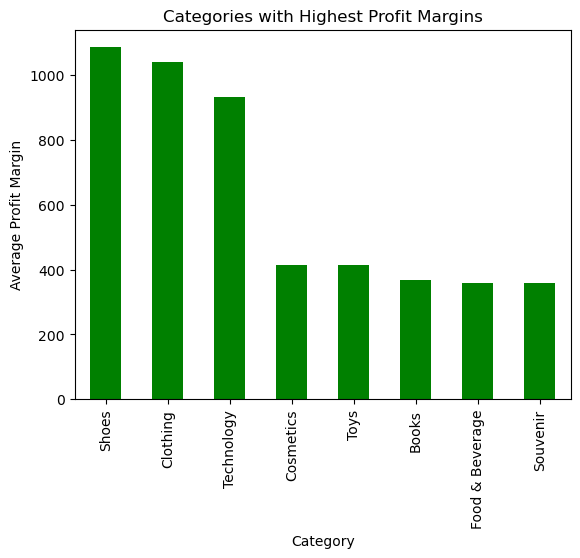

In [43]:
df['Profit Margin'] = (df['Total Sales'] / df['Total Profit']) * 100
average_profit = df.groupby('category')['Profit Margin'].mean()
sorted_profit_margin = df.groupby('category')['Profit Margin'].mean().sort_values(ascending=False)

sorted_profit_margin.plot(kind='bar', color='green')
plt.title('Categories with Highest Profit Margins')
plt.xlabel('Category')
plt.ylabel('Average Profit Margin')
plt.show()

### 14.  What is the total number of transactions per region for each payment method?

In [46]:
transactions_per_region_payment = df.groupby(['region', 'payment_method']).size()
transactions_per_region_payment

region   payment_method
Central  Cash              10319
         Credit Card        8140
         Debit Card         4640
East     Cash              12738
         Credit Card        9817
         Debit Card         5751
South    Cash               7227
         Credit Card        5698
         Debit Card         3284
West     Cash              14163
         Credit Card       11276
         Debit Card         6404
dtype: int64

### 15. How do sales in different categories compare between males and females?

In [51]:
gender = df.groupby(['category', 'gender'])['Total Sales'].sum().unstack()
gender

gender,Female,Male
category,,
Books,489420.75,345238.20
Clothing,68260097.84,45754397.92
Cosmetics,4068073.66,2728611.28
Food & Beverage,505322.60,344233.37
Shoes,39425167.30,27128284.17
Souvenir,382867.20,252957.45
Technology,34669950.00,23230200.00
Toys,2416046.08,1564380.16
